정규화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

유방암 데이터

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

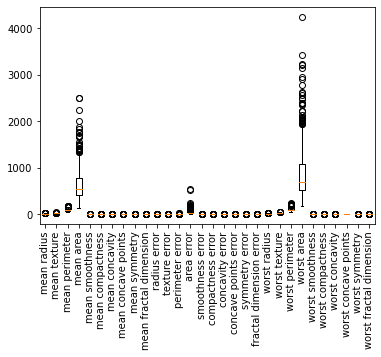

In [4]:
plt.boxplot(cancer.data)
plt.xticks(range(1,31), cancer.feature_names, rotation=90)
pass

모든 속성을 다 사용하여 SVC 적용

In [5]:
from sklearn.svm import SVC

In [6]:
X = cancer.data
y = cancer.target

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [9]:
model = SVC()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.92018779342723 0.8671328671328671


정규화 적용
- 정규화는 옵션이 아니라 필수이다
- 머신러닝에서 결과가 이상할 때, 가장 큰 실수는 정규화 미적용에서 발생한다

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [12]:
m = X_train.mean(axis=0)
s = X_train.std(axis=0)

X_train_norm = (X_train-m)/s
X_test_norm = (X_test-m)/s

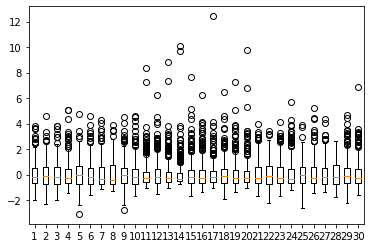

In [13]:
plt.boxplot(X_train_norm); pass

In [14]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [15]:
m = X_train.mean(axis=0)
s = X_train.std(axis=0)

X_train_norm = (X_train-m)/s
X_test_norm = (X_test-m)/s

In [16]:
model = SVC()
model.fit(X_train_norm, y_train)
train_score = model.score(X_train_norm, y_train)
test_score  = model.score(X_test_norm, y_test)
print(train_score, test_score)

0.9906103286384976 0.965034965034965


결과 심층분석
- 맞은 샘플은 왜 맞았으며, 틀린 샘플은 왜 틀린 것일까?

In [17]:
y_pred = model.predict(X_test_norm)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [18]:
y_test

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [19]:
(y_test==y_pred).mean()

0.965034965034965

In [20]:
(y_test!=y_pred).sum()

5

In [21]:
y_test[y_test!=y_pred]

array([0, 1, 0, 0, 0])

In [22]:
y_pred[y_test!=y_pred]

array([1, 0, 1, 1, 1])

In [23]:
np.where(y_test!=y_pred)

(array([ 41,  73,  94, 102, 119], dtype=int64),)

In [24]:
X_test[[18,83]]

array([[1.364e+01, 1.560e+01, 8.738e+01, 5.753e+02, 9.423e-02, 6.630e-02,
        4.705e-02, 3.731e-02, 1.717e-01, 5.660e-02, 3.242e-01, 6.612e-01,
        1.996e+00, 2.719e+01, 6.470e-03, 1.248e-02, 1.810e-02, 1.103e-02,
        1.898e-02, 1.794e-03, 1.485e+01, 1.905e+01, 9.411e+01, 6.834e+02,
        1.278e-01, 1.291e-01, 1.533e-01, 9.222e-02, 2.530e-01, 6.510e-02],
       [1.546e+01, 2.395e+01, 1.038e+02, 7.313e+02, 1.183e-01, 1.870e-01,
        2.030e-01, 8.520e-02, 1.807e-01, 7.083e-02, 3.331e-01, 1.961e+00,
        2.937e+00, 3.252e+01, 9.538e-03, 4.940e-02, 6.019e-02, 2.041e-02,
        2.105e-02, 6.000e-03, 1.711e+01, 3.633e+01, 1.177e+02, 9.094e+02,
        1.732e-01, 4.967e-01, 5.911e-01, 2.163e-01, 3.013e-01, 1.067e-01]])